Analysis of Global Temperature Anomaly:
This dataset contains the normalised global temperatures from the year 1880 to 2016.

Before proceeding further, let's load the dependencies..

In [2]:
import numpy as np
import pandas as pd
from pandas.io.json import json_normalize

We're done with loading dependencies! Now let's make a dataframe out of the global temperature data which is in JSON format.

In [3]:
df = pd.read_json("https://www.ncdc.noaa.gov/cag/global/time-series/globe/land_ocean/ytd/12/1880-2016.json", typ = 'Frame')
df = pd.DataFrame.from_dict(json_normalize(list(df)),orient = 'columns')
df

,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,...,2011,2012,2013,2014,2015,2016,base_period,missing,title,units
0,-0.11,-0.08,-0.10,-0.18,-0.26,-0.25,-0.24,-0.28,-0.13,-0.09,...,0.57,0.63,0.67,0.73,0.92,0.98,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1901-2000,-999.0,"Global Land and Ocean Temperature Anomalies, J...",Degrees Celsius


As we can see, the last four columns of the dataframe namely: 'base_period' to 'units' give the details of the datset, which can be kept aside for now, for analysis purpose, we just need the temperature data recorded in different years! hence, let's use only the data part of the dataframe by following the below steps.

In [43]:
data_temp = df.iloc[0,:-4].astype(float) # To say that 'data_temp' dataframe should contain all rows and all columns except the last four
data_temp.tail()

2012    0.63
2013    0.67
2014    0.73
2015    0.92
2016    0.98
Name: 0, dtype: float64

Now let's plot the data to get more insights into it!

count    137.000000
mean       0.048321
std        0.322733
min       -0.450000
25%       -0.180000
50%       -0.040000
75%        0.240000
max        0.980000
Name: 0, dtype: float64

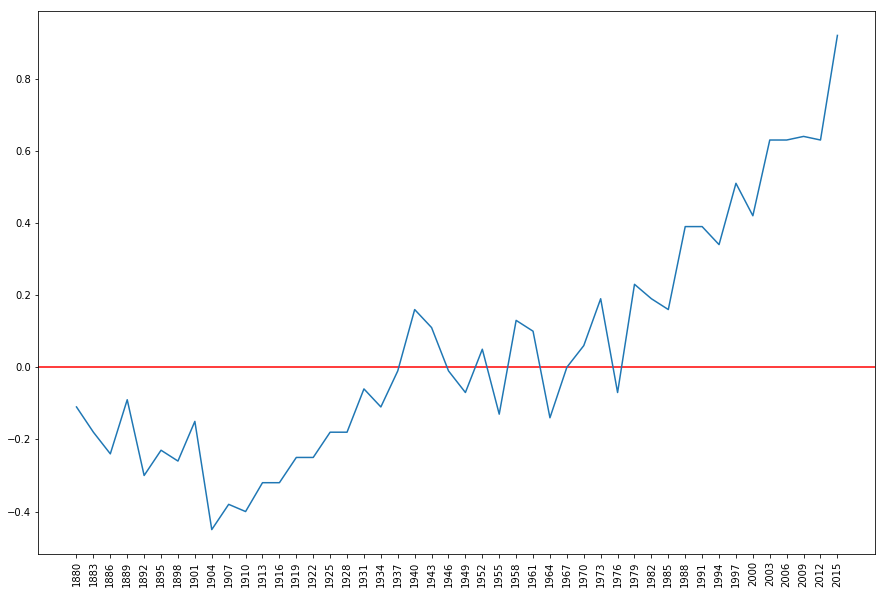

In [48]:
fig = plt.figure(figsize = (15,10))
plt.ion
final = np.arange(0,len(data_temp),3)
x = data_temp[final].index.tolist()
y = data_temp[final].tolist()
plt.xticks (rotation = 'vertical')
plt.axhline(y = 0.0, color = 'r', linestyle = '-')
plt.plot(x,np.array(y, dtype = float))
data_temp.describe()

As we can see, the global temperatures are increasing almost monotonously from around 1900's which is an indication of increasing global warming!